# Purpose of this jupyter notebook is to test image capturing classes

## CameraBase

CameraBase is a baseclass for capturing images. It can work for still images and videos.


In [ ]:
## CameraBase

CameraBase is a baseclass for capturing images. It can work for still images and videos.

In [7]:
# Create instance of CameraBase class

import Camera


cam = Camera.CameraBase()

# Test calibration
print("Please wait a moment...")
ret = cam.calibrate_folder('./camera_cal/*.jpg', (9, 6), verbose=0)
print("Re-projection error is: ", ret)

Please wait a moment...


Re-projection error is:  0.845774970750333


In [8]:
# Test: Saving and loading calibration coeffiecients

import tempfile
tmpdir = tempfile.TemporaryDirectory()
filename = tmpdir.name + "calibration.npy"
print("Saving calibration...")
cam.save_params(filename)
print("Loading calibration...")
cam.load_params(filename)

tmpdir.cleanup()

Saving calibration...
Loading calibration...


In [9]:
%matplotlib inline
def plot2(title, img_a, img_b, desc_a, desc_b, figsize=(12, 4)):
    """Plots 2 image side by side."""
    
    # Plot original and undistorted image
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title, fontsize=20)
    
    # Plot img_a
    a = fig.add_subplot(1, 2, 1)
    plt.axis('off')
    plt.title(desc_a)
    plt.imshow(img_a)
    
    # Plot img_b
    b = fig.add_subplot(1, 2, 2)
    plt.title(desc_b)
    plt.axis('off')
    plt.imshow(img_b)
    plt.show()

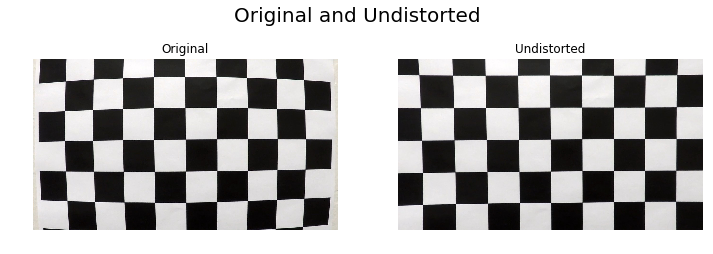

In [10]:
# Test: Undistort
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

filename = "./camera_cal/calibration1.jpg"
image = cv2.imread(filename)

# Correct color space to RGB for showing image with pyplot
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Undistort
undistorted = cam.undistort(image)

# Show images
plot2("Original and Undistorted", image, undistorted, "Original", "Undistorted")

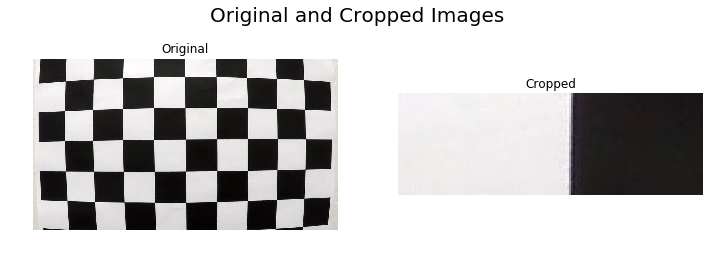

In [11]:
# Test Crop

import Camera
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

filename = "./camera_cal/calibration1.jpg"
image = cv2.imread(filename)

# Correct color space to RGB for showing image with pyplot
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Open camera instance
cam2 = Camera.CameraBase(name='test', do_crop=True, crop_rect=((50, 150), (200, 200)))

# Crop
cropped = cam2.crop(image)

# Show images
plot2("Original and Cropped Images", image, cropped, "Original", "Cropped")

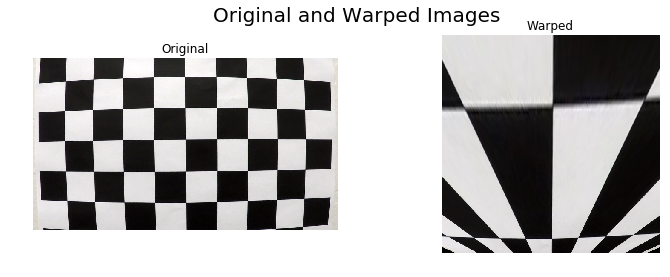

In [12]:
# Test: Warp

import Camera
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

filename = "./camera_cal/calibration1.jpg"
image = cv2.imread(filename)

# Correct color space to RGB for showing image with pyplot
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Define Perspective transformation
yt = 460  # Y-top
yb = 670  # Y-bottom
src = np.array([[710, yt],  # Top-Right
                [1080, yb],  # Bottom-Right
                [200, yb],  # Bottom-Left
                [569, yt]],  # Top-Left
               dtype=np.float32)

warped_image_size=(512, 512)
dst = np.array([[warped_image_size[0] * 0.8, warped_image_size[1] * 0],  # * 0.1
                [warped_image_size[0] * 0.8, warped_image_size[1]],  # * 0.9
                [warped_image_size[0] * 0.2, warped_image_size[1]],  # * 0.9
                [warped_image_size[0] * 0.2, warped_image_size[1] * 0]],  # * 0.1
               dtype=np.float32)


cam2 = Camera.CameraBase(name='test', do_warp=True, warp_mtx=(src, dst), 
                         warp_src_img_size=(image.shape[1], image.shape[0]),
                         warp_dst_img_size=warped_image_size)
# Warp
warped = cam2.warp(image)

# Show images
plot2("Original and Warped Images", image, warped, "Original", "Warped")

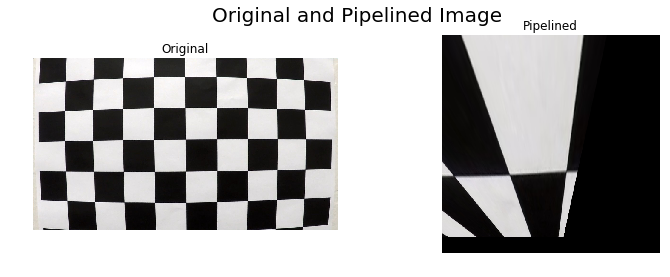

In [13]:
# Test Pipeline

import Camera
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cam3 = Camera.CameraBase(name='test', do_undistort=True, do_crop=True, do_warp=True, 
                         crop_rect=((100, 100), (800,700)),
                         warp_mtx=(src, dst), 
                         warp_src_img_size=(image.shape[0], image.shape[1]),
                         warp_dst_img_size=warped_image_size)
cam3.calibrate_folder('./camera_cal/*.jpg', (9, 6), verbose=0)

# Define Perspective transformation again to work with cropped image size
yt = 50  # Y-top
yb = 300  # Y-bottom
src = np.array([[300, yt],  # Top-Right
                [350, yb],  # Bottom-Right
                [100, yb],  # Bottom-Left
                [150, yt]],  # Top-Left
               dtype=np.float32)
# Apply pipeline
pipelined = cam3.apply_pipeline(image)

plot2("Original and Pipelined Image", image, pipelined, "Original", "Pipelined")

## CameraVideoClipMPY

Is a class which simulates camera. It returns images from video clip.

In [2]:
# Test

import Camera
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

cam4 = Camera.CameraVideoClipMPY(name="project_video.mp4")
i_frame_ms = 1 / cam4.clip.fps * 1000  # Interval between frames in milliseconds

for frame in cam4:
    # Correct color space to BGR for showing image with cv2
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Show images
    cv2.imshow('image', frame)
    if cv2.waitKey(int(i_frame_ms)) & 0xFF == ord('q'):
        break
cv2.waitKey(5000)
cv2.destroyWindow('image')

In [7]:
# Test Pipeline
import Camera
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Define Perspective transformation
yt = 460  # Y-top
yb = 670  # Y-bottom
src = np.array([[710, yt],  # Top-Right
                [1080, yb],  # Bottom-Right
                [200, yb],  # Bottom-Left
                [569, yt]],  # Top-Left
               dtype=np.float32)

original_image_size=(1280, 720)
warped_image_size=(512, 512)
dst = np.array([[warped_image_size[0] * 0.8, warped_image_size[1] * 0],  # * 0.1
                [warped_image_size[0] * 0.8, warped_image_size[1]],  # * 0.9
                [warped_image_size[0] * 0.2, warped_image_size[1]],  # * 0.9
                [warped_image_size[0] * 0.2, warped_image_size[1] * 0]],  # * 0.1
               dtype=np.float32)


crop_rect=((0, int(original_image_size[1]/2)), 
           (original_image_size[0], original_image_size[1]))

cam5 = Camera.CameraVideoClipMPY(name="project_video.mp4", 
                                 do_crop=True, crop_rect=crop_rect,
                                 do_warp=True, warp_mtx=(src, dst), 
                                 warp_src_img_size=(original_image_size[0], original_image_size[1]),
                                 warp_dst_img_size=warped_image_size)

print("Calibrating. Please wait for a while...")
ret = cam5.calibrate_folder('./camera_cal/*.jpg', (9, 6), verbose=0)
print("Re-projection error is: ", ret)

i_frame_ms = 1 / cam5.clip.fps * 1000  # Interval between frames in milliseconds

for frame in cam5:
    # Correct color space to BGR for showing image with cv2
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Show images
    cv2.imshow('image', frame)
    if cv2.waitKey(int(i_frame_ms)) & 0xFF == ord('q'):
        break
cv2.waitKey(5000)
cv2.destroyWindow('image')

Calibrating. Please wait for a while...


Re-projection error is:  0.845774970750333


## UdacityAdvLane

Test specific camera for Udacity Advanced lane finding project

In [3]:
# Camera tests of udacity lane finder project camera
from Camera.UdacityAdvLane import UdacityAdvLane as ucam 
import cv2

# filename = 'project_video.mp4'
filename = 'challenge_video.mp4'
# filename = 'harder_challenge_video.mp4'

udacam = ucam(filename)

i_frame_ms = 1 / udacam.clip.fps * 1000  # Interval between frames in milliseconds

for frame in udacam:
    # Correct color space to BGR for showing image with cv2
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    # Show images
    cv2.imshow('image', frame)
    if cv2.waitKey(int(i_frame_ms/2)) & 0xFF == ord('q'):
        break
cv2.waitKey(5000)
cv2.destroyWindow('image')

(1280, 360)


In [2]:
# Undistort and crop straight lane image for defining warp source matrix
from Camera.UdacityAdvLane import UdacityAdvLane as ucam 
import matplotlib.pyplot as plt
import cv2

filename = 'project_video.mp4'


udacam = ucam(filename)
#udacam.do_warp = False
#udacam.pipeline = udacam._create_pipeline(True, True, False)

img = cv2.imread("./test_images/straight_lines2.jpg")
undistorted = udacam.undistort(img)
cv2.imwrite("./output_images/udacam_undistorted.jpg", undistorted)
cropped = udacam.crop(undistorted)
cv2.imwrite("./output_images/udacam_undistorted_cropped.jpg", cropped)
warped = udacam.warp(cropped)
cv2.imwrite("./output_images/udacam_undistorted_cropped_warped.jpg", warped)

(1280, 360)


True